In [5]:
import warnings
warnings.filterwarnings("ignore")
from collections import defaultdict
from tqdm import tqdm_notebook as tqdm
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/home/dkbrz/GitHub/Git_Commits/data/junk/verbs2.csv')

In [23]:
df.head()

,Word,Date,neut,ptcp,ing,3rd,Total,neut_per,ptcp_per,ing_per,3rd_per
0,merge,before 2010,342242,40656,7097,216,390211,0.877069,0.104190,0.018188,0.000554
1,merge,after 2013,4657609,27988,6857,647,4693101,0.992437,0.005964,0.001461,0.000138
2,add,before 2010,346254,369507,40590,4604,760955,0.455026,0.485583,0.053341,0.006050
3,add,after 2013,1846846,597295,127763,59750,2631654,0.701781,0.226966,0.048549,0.022704
4,fix,before 2010,456493,273156,25838,34495,789982,0.577852,0.345775,0.032707,0.043666


In [24]:
df.columns = ['word', 'period', 'n', 'p', 'i', '3', 'total', 'neutral', 'participle', 'V-ing', '3rd']

In [25]:
df2 = df[['word', 'neutral', 'participle', 'V-ing', '3rd']][:100]

In [26]:
data = []
for i in range(len(df2)):
    row = df2.iloc[i].tolist()
    if i % 2 == 0:
        data.append(row)
    else:
        row[0] = ''
        data.append(row)
        data.append(['',0,0,0,0])

In [27]:
df2_2 = pd.DataFrame(data)
df2_2.columns = ['word', 'neutral', 'participle', 'V-ing', '3rd']

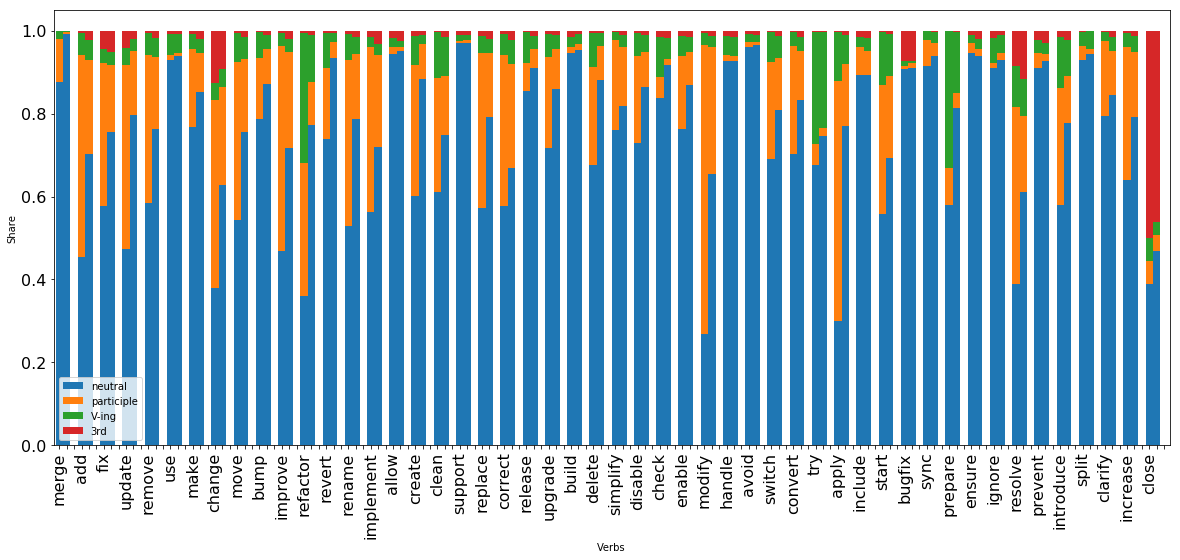

In [29]:
df2_2.plot(kind='bar', stacked=True, figsize=(20, 8), rot=90, fontsize=16, width=1)
#plt.xticks(plt.xticks()[0], df1.word.values);
#df2.plot.bar(stacked=True, figsize=(20, 10), rot=90)
labels = []
plt.xticks(plt.xticks()[0], df2_2.word.values);
plt.ylabel('Share')
plt.xlabel('Verbs');

In [31]:
from scipy.stats import chisquare

In [48]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [59]:
a = np.zeros((2,4))[0]
a+=row[['n','p','i','3']].values.astype(int)
a

array([3.42242e+05, 4.06560e+04, 7.09700e+03, 2.16000e+02])

In [94]:
verbs = defaultdict(lambda: np.zeros((2,2)))
for i in range(len(df)):
    row = df.iloc[i]
    s = row[['n','p','i','3']].values.astype(int).sum()
    if row['period'] == 'before 2010':
        verbs[row['word']][0][0] += row['n']/s*100
        verbs[row['word']][0][1] += row[['p','i','3']].values.astype(int).sum()/s*100
    else:
        #s = row[['n','p','i','3']].values.astype(int).sum()
        #S = verbs[row['word']][0].sum()
        verbs[row['word']][1][0] += row['n']/s*100
        verbs[row['word']][1][1] += row[['p','i','3']].values.astype(int).sum()/s*100

In [89]:
verbs['merge'].tolist()

[[0.8770690728862077, 0.12293092711379228],
 [0.9924374097212056, 0.007562590278794341]]

In [83]:
chisquare([[1, 2, 3, 4, 5],[10, 20, 30, 40, 50]], axis=None)

Power_divergenceResult(statistic=171.66666666666669, pvalue=2.773768500520377e-32)

In [98]:
for i in verbs:
    p = chisquare(verbs[i], axis=None).pvalue
    if p > 0.01:
        print('!', i, '\t', p)
    else:
        print('.', i, '\t', p)

. merge 	 3.853072158167265e-33
. add 	 0.000675525479918413
. fix 	 2.4710560710032746e-06
. update 	 1.066943923792866e-07
. remove 	 1.0955136709783129e-06
. use 	 1.6577603701770164e-32
. make 	 6.640311773414412e-17
. change 	 0.006129280659897736
. move 	 5.740259125954143e-06
. bump 	 4.675394244013006e-19
. improve 	 0.00023759132003515435
. refactor 	 3.245895868854582e-08
. revert 	 3.540755765252592e-21
. rename 	 2.662868463045527e-07
. implement 	 0.00010475398040125442
. allow 	 1.632616221003974e-34
. create 	 1.4924087769237778e-13
. clean 	 1.4835317632699153e-06
. support 	 5.075742448458026e-38
. replace 	 7.217194576403218e-08
. correct 	 0.003277539010567503
. release 	 2.815113697715704e-25
. upgrade 	 3.810809909687474e-15
. build 	 6.371921313903757e-35
. delete 	 3.126942106060367e-15
. simplify 	 1.1603320184619479e-14
. disable 	 5.153758735263044e-16
. check 	 8.379562956025726e-25
. enable 	 8.590671665847344e-18
. modify 	 7.212381432595481e-07
. handle 	 

In [2]:
import json

me = json.load(open('/home/dkbrz/GitHub/Git_Commits/data/junk/me.json'))

In [43]:
import conllu

In [23]:
verbs = defaultdict(int)
for item in tqdm(me):
    parsed = conllu.parse(item['conllu'])[0]
    for key, i in enumerate(parsed):
        if i['deprel'] == 'root':
            if i['upostag'] == 'AUX':
                for j in parsed:
                    if j['head'] == key and j['deprel'] == 'aux':
                        verbs[j['lemma']] += 1
            elif i['upostag'] == 'VERB':
                verbs[i['lemma']] += 1

In [27]:
for i in sorted(verbs, key=verbs.get, reverse=True):
    if verbs[i] > 100:
        print(i,'-',verbs[i], end='; ')

think - 3632; forget - 1317; have - 1105; know - 996; add - 956; hate - 817; guess - 744; need - 651; like - 612; get - 549; believe - 468; want - 441; make - 418; change - 373; do - 352; fix - 339; miss - 334; find - 333; hope - 330; see - 319; remove - 311; break - 295; use - 256; love - 236; mean - 235; give - 197; notice - 186; understand - 155; agree - 151; try - 146; remember - 139; suck - 138; feel - 136; swear - 131; commit - 129; prefer - 128; go - 126; update - 125; wonder - 119; write - 116; spell - 114; keep - 112; move - 109; put - 105; say - 104; fail - 102; correct - 101; 

In [28]:
years = defaultdict(int)
for item in tqdm(me):
    year = item['date'][:4]
    years[year] += 1

In [30]:
labels = [key for key in sorted(years)]
bars = [years[key] for key in sorted(years)]

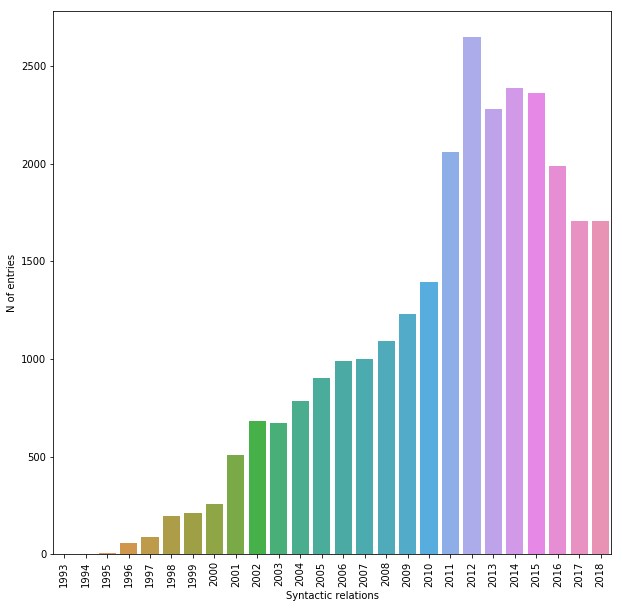

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=labels, y=bars)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N of entries')
plt.xlabel('Syntactic relations');

In [41]:
me = json.load(open('/home/dkbrz/GitHub/Git_Commits/data/junk/this.json'))

In [46]:
verbs = defaultdict(int)
for item in tqdm(me):
    verb = item['text'].split()[2]
    verbs[verb] += 1

In [54]:
for i in sorted(verbs, key=verbs.get, reverse=True):
    if i.endswith('s') and verbs[i] > 10:
        print(i, '-', verbs[i], end='; ')

was - 1104; fixes - 613; adds - 358; is - 233; contains - 90; implements - 65; makes - 57; changes - 54; includes - 51; removes - 51; introduces - 39; has - 35; addresses - 33; improves - 32; allows - 30; represents - 26; updates - 24; does - 23; moves - 20; merges - 18; closes - 16; resolves - 15; refactors - 15; replaces - 14; enables - 14; concerns - 14; cleans - 13; brings - 13; incorporates - 11; sets - 11; 

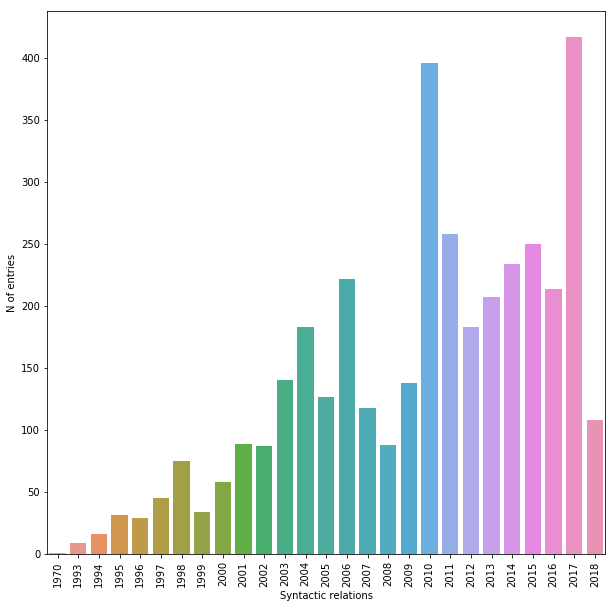

In [52]:
years = defaultdict(int)
for item in tqdm(me):
    year = item['date'][:4]
    years[year] += 1

labels = [key for key in sorted(years)]
bars = [years[key] for key in sorted(years)]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=labels, y=bars)
plt.xticks(plt.xticks()[0], labels);
ax.tick_params(axis='x', rotation=90);
plt.ylabel('N of entries')
plt.xlabel('Syntactic relations');